<a href="https://colab.research.google.com/github/deshanchathusanka/optimisation/blob/main/penalty_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import math
import sys
import numpy as np
import matplotlib.pyplot as plt

Task 1

In [7]:
def f(x):
  _f = ((6*x - 2)**2)*(math.sin(12*x - 4))
  return _f

assert round(f(1), 2) == 15.83

In [8]:
def g(x):
  _g = math.sin(10*x)
  return _g

assert round(g(1), 2) == -0.54

In [31]:
def pi_death(x, _max):
  _pi_death = _max
  
  if(g(x) <= 0):
    _pi_death = f(x)
  
  return _pi_death

assert pi_death(0.25, 20) == 20
assert round(pi_death(1, 20), 2) == 15.83

In [14]:
def pi_static(x, r, beta):
  _pi_static = f(x) + r*(max(0, g(x))**beta)
  return _pi_static

assert pi_static(0.25, 5, 1) > f(0.25)
assert round(pi_static(1, 5, 1), 2) == 15.83

Task 2

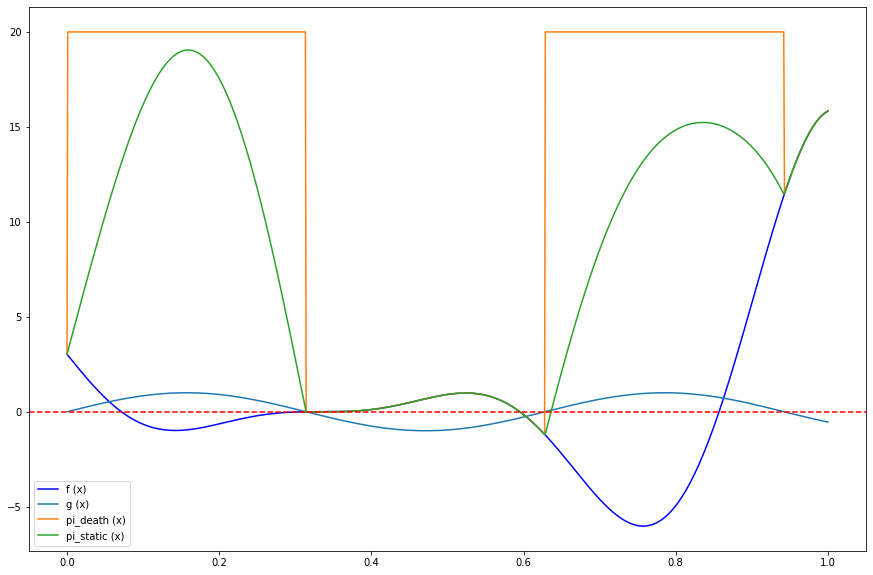

In [45]:
x_np = np.linspace(start = 0, stop = 1, num = 1000)
_fx = [f(x) for x in x_np]
_gx = [g(x) for x in x_np]
_pi_death = [pi_death(x, 20) for x in x_np]
_pi_static = [pi_static(x, 20, 1) for x in x_np]

plt.figure(figsize = (15, 10))
plt.plot(x_np, _fx, color = 'blue', label = 'f (x)')
plt.plot(x_np, _gx, label = 'g (x)')
plt.plot(x_np, _pi_death, label = 'pi_death (x)')
plt.plot(x_np, _pi_static, label = 'pi_static (x)')
plt.axhline(color = 'red', linestyle = 'dashed')
plt.legend()
plt.show()

Task 3

In [49]:
_x_min = x_np[np.argmin(_fx)]
_f_min = np.min(_fx)

print(f'Minimum x value without constrains : {_x_min}')
print(f'Minimum f(x) value without constrains : {_f_min}')

Minimum x value without constrains : 0.7567567567567568
Minimum f(x) value without constrains : -6.020610973593629


Task 4

In [55]:
_x_cons = [x for x in x_np if g(x)<=0]
_fx_cons = [f(x) for x in _x_cons]
_x_min_cons = _x_cons[np.argmin(_fx_cons)]
_f_min_cons = np.min(_fx_cons)

print(f'Minimum x value with constrains : {_x_min_cons}')
print(f'Minimum f(x) value with constrains : {_f_min_cons}')

Minimum x value with constrains : 0.6276276276276276
Minimum f(x) value with constrains : -1.1852241199178717


Task 5

In [73]:
_x_min_death = x_np[np.argmin(_pi_death)]
_pi_death_min = np.min(_pi_death)
print(f'Minimum x value in death penalty : {_x_min_death}')
print(f'Minimum pi_death(x) value in death penalty : {_pi_death_min}\n')

_x_min_static = x_np[np.argmin(_pi_static)]
_pi_static_min = np.min(_pi_static)
print(f'Minimum x value in static penalty : {_x_min_static}')
print(f'Minimum pi_static(x) value in static penalty : {_pi_static_min}')

Minimum x value in death penalty : 0.6276276276276276
Minimum pi_death(x) value in death penalty : -1.1852241199178717

Minimum x value in static penalty : 0.6276276276276276
Minimum pi_static(x) value in static penalty : -1.1852241199178717


Task 6

In [70]:
def pi_static_prime(x, r, beta):
  _pi_static = f(x) - r*(max(0, g(x))**beta)
  return _pi_static

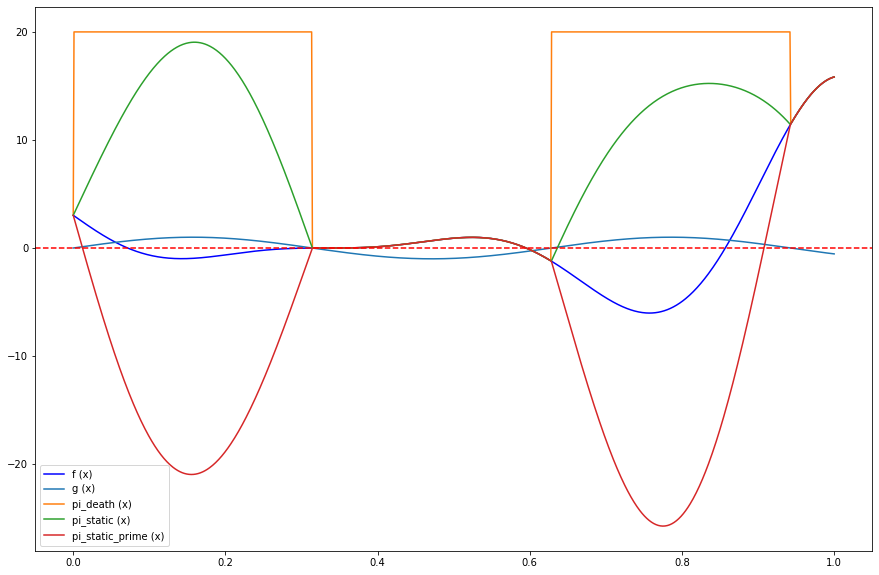

In [72]:
_pi_static_prime = [pi_static_prime(x, 20, 1) for x in x_np]

plt.figure(figsize = (15, 10))
plt.plot(x_np, _fx, color = 'blue', label = 'f (x)')
plt.plot(x_np, _gx, label = 'g (x)')
plt.plot(x_np, _pi_death, label = 'pi_death (x)')
plt.plot(x_np, _pi_static, label = 'pi_static (x)')
plt.plot(x_np, _pi_static_prime, label = 'pi_static_prime (x)')
plt.axhline(color = 'red', linestyle = 'dashed')
plt.legend()
plt.show()

In [81]:
_x_static_prime_min = x_np[np.argmin(_pi_static_prime)]
_pi_static_prime_min = np.min(_pi_static_prime)

print(f'Minimum x value in subtracted static penalty : {_x_static_prime_min}')
print(f'Minimum pi_static(x) in subtracted static penalty : {_pi_static_prime_min}')

Minimum x value in subtracted static penalty : 0.7747747747747747
Minimum pi_static(x) in subtracted static penalty : -25.73637832018724


$\color{Red}{\text{The modified static penalty function is useful when searching maximum of a function.}}$

Task 7

In [80]:
def pi_static_modified(x, r, beta):
  _pi_static_modified = f(x) + r*(min(0, g(x))**beta)
  return _pi_static_modified

In [82]:
_pi_static_modified = [pi_static_modified(x,20,2) for x in x_np]
_x_static_modified_min = x_np[np.argmin(_pi_static_modified)]
_pi_static_modified_min = np.min(_pi_static_modified)

print(f'Minimum x value in modified static penalty : {_x_static_modified_min}')
print(f'Minimum pi_static(x) in modified static penalty : {_pi_static_modified_min}')

Minimum x value in modified static penalty : 0.7567567567567568
Minimum pi_static(x) in modified static penalty : -6.020610973593629


$\color{Red}{\text{This finds the exact minimum of the range without constrains}}$

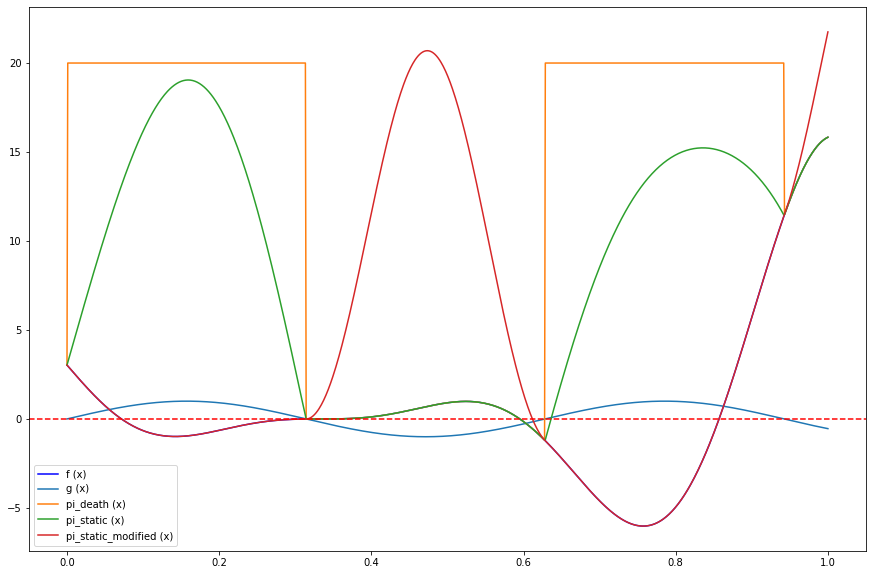

In [83]:
plt.figure(figsize = (15, 10))
plt.plot(x_np, _fx, color = 'blue', label = 'f (x)')
plt.plot(x_np, _gx, label = 'g (x)')
plt.plot(x_np, _pi_death, label = 'pi_death (x)')
plt.plot(x_np, _pi_static, label = 'pi_static (x)')
plt.plot(x_np, _pi_static_modified, label = 'pi_static_modified (x)')
plt.axhline(color = 'red', linestyle = 'dashed')
plt.legend()
plt.show()